In [2]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import xarray as xr
import matplotlib.colors as pltc
import geopandas
import datetime as dt
from scipy import stats
from sklearn import preprocessing
import s3fs
import matplotlib as mpl
import rasterio
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

In [28]:
src = rasterio.open("../data/PROSPER/SPP_MEAN.tif")

In [26]:
starkey = geopandas.read_file("../data/starkey/mygeodata/Starkey_Experimental_Forest_and_Range_Streams.gdb-line.shp").to_crs(epsg=5070) #https://www.fs.usda.gov/rds/archive/catalog/RDS-2018-0019

In [25]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd

inshp = '../data/starkey/mygeodata/Starkey_Experimental_Forest_and_Range_Streams.gdb-line.shp'
inRas = '../data/PROSPER/SPP_MEAN.tif'
outRas = '../data/STARKEY_PROSPER_SPP_MEAN.tif'


Vector=gpd.read_file(inshp)

# Vector=Vector[Vector['HYBAS_ID']==6060122060] # Subsetting to my AOI

with rasterio.open(inRas) as src:
    Vector=Vector.to_crs(src.crs)
    # print(Vector.crs)
    out_image, out_transform=mask(src,Vector.geometry,crop=True)
    out_meta=src.meta.copy() # copy the metadata of the source DEM
    
out_meta.update({
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})
              
with rasterio.open(outRas,'w',**out_meta) as dst:
    dst.write(out_image)

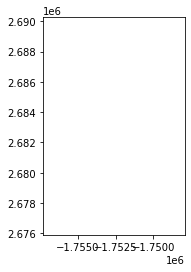

<AxesSubplot:>

In [32]:
from rasterio.plot import show

src = rasterio.open("../data/STARKEY_PROSPER_SPP_MEAN.tif")
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
# extent = [starkey.total_bounds[0], starkey.total_bounds[2], starkey.total_bounds[1], starkey.total_bounds[3]]
rasterio.plot.show(src)

# gdf.plot(ax=ax)

array([[[-3.402823e+38, -3.402823e+38, -3.402823e+38, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        ...,
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, ...,
         -3.402823e+38, -3.402823e+38, -3.402823e+38]]], dtype=float32)